In [3]:
import pandas as pd

import itertools as t

#from pandas_profiling import ProfileReport

import networkx as nx

from networkx.algorithms import bipartite

from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

In [4]:
#df = pd.read_csv("launchData.csv")
#df = pd.read_excel("Data_Aviva.xlsx")
df = pd.read_csv("aviva _Sheet1.csv")

In [5]:
# import os
# os.getcwdb()

In [6]:
df_xy = pd.read_excel("DataYishuvim_XY.xls")
df_xy.shape
df_xy.head()


,LAMAS.setl_all.ENG_NAME,X,Y,Sheet2$.data,Sheet2$.Semel,Sheet2$.count
0,Kefar Silver,163253,620228,כפר סילבר,107.0,25.0
1,Gat Rimmon,188836,663951,גת רימון,128.0,10.0
2,Gan Shelomo,181071,642877,גן שלמה,144.0,10.0
3,Giv'at Brenner,181271,641675,גבעת ברנר,147.0,10.0
4,Tel Mond,192402,684387,תל מונד,154.0,1.0


In [8]:
df_xy.fillna(0)
df_xy.replace()
df_xy.tail()

,LAMAS.setl_all.ENG_NAME,X,Y,Sheet2$.data,Sheet2$.Semel,Sheet2$.count
1278,no name,171818,645832,NaN,NaN,NaN
1279,no name,177315,634394,NaN,NaN,NaN
1280,no name,176752,630962,NaN,NaN,NaN
1281,no name,176432,625712,NaN,NaN,NaN
1282,no name,161451,602833,NaN,NaN,NaN


In [9]:
df_xy = df_xy.dropna()
df_xy.shape

(421, 6)

In [10]:
df_xy.tail()

,LAMAS.setl_all.ENG_NAME,X,Y,Sheet2$.data,Sheet2$.Semel,Sheet2$.count
416,Nes Ziyyona,181010,648228,נס ציונה,7200.0,19.0
417,Netanya,187255,691400,נתניה,7400.0,1.0
418,no name,186262,652278,תעשיון צריפין,1749.0,19.0
419,no name,179944,629543,תעשיון ראם*,1755.0,7.0
420,no name,168152,630087,עד הלום,1762.0,61.0


In [11]:
df_xy['Semel'] = df_xy['Sheet2$.Semel']

In [12]:
df_xy['Semel'] = df_xy.Semel.astype(int)
df_xy.head()

,LAMAS.setl_all.ENG_NAME,X,Y,Sheet2$.data,Sheet2$.Semel,Sheet2$.count,Semel
0,Kefar Silver,163253,620228,כפר סילבר,107.0,25.0,107
1,Gat Rimmon,188836,663951,גת רימון,128.0,10.0,128
2,Gan Shelomo,181071,642877,גן שלמה,144.0,10.0,144
3,Giv'at Brenner,181271,641675,גבעת ברנר,147.0,10.0,147
4,Tel Mond,192402,684387,תל מונד,154.0,1.0,154


In [13]:
df.head()

,data original,Unnamed: 1,data,date,time,datetime,semel
0,איבים,1,איבים,18.05.2021,15:46,2021-05-18T15:47:00,338
1,איבים,1,איבים,18.05.2021,15:38,2021-05-18T15:39:00,338
2,איבים,1,איבים,18.05.2021,15:31,2021-05-18T15:31:00,338
3,איבים,1,איבים,17.05.2021,23:01,2021-05-17T23:02:00,338
4,איבים,1,איבים,17.05.2021,22:06,2021-05-17T22:07:00,338


In [14]:
new_df = df.join(df_xy.set_index('Semel'), on='semel')
new_df.head()

,data original,Unnamed: 1,data,date,time,datetime,semel,LAMAS.setl_all.ENG_NAME,X,Y,Sheet2$.data,Sheet2$.Semel,Sheet2$.count
0,איבים,1,איבים,18.05.2021,15:46,2021-05-18T15:47:00,338,Ibbim,162974.0,604773.0,איבים,338.0,77.0
1,איבים,1,איבים,18.05.2021,15:38,2021-05-18T15:39:00,338,Ibbim,162974.0,604773.0,איבים,338.0,77.0
2,איבים,1,איבים,18.05.2021,15:31,2021-05-18T15:31:00,338,Ibbim,162974.0,604773.0,איבים,338.0,77.0
3,איבים,1,איבים,17.05.2021,23:01,2021-05-17T23:02:00,338,Ibbim,162974.0,604773.0,איבים,338.0,77.0
4,איבים,1,איבים,17.05.2021,22:06,2021-05-17T22:07:00,338,Ibbim,162974.0,604773.0,איבים,338.0,77.0


In [15]:
df = new_df[["data","date","time","datetime","semel","LAMAS.setl_all.ENG_NAME","X","Y","Sheet2$.count"]]

df.head()

,data,date,time,datetime,semel,LAMAS.setl_all.ENG_NAME,X,Y,Sheet2$.count
0,איבים,18.05.2021,15:46,2021-05-18T15:47:00,338,Ibbim,162974.0,604773.0,77.0
1,איבים,18.05.2021,15:38,2021-05-18T15:39:00,338,Ibbim,162974.0,604773.0,77.0
2,איבים,18.05.2021,15:31,2021-05-18T15:31:00,338,Ibbim,162974.0,604773.0,77.0
3,איבים,17.05.2021,23:01,2021-05-17T23:02:00,338,Ibbim,162974.0,604773.0,77.0
4,איבים,17.05.2021,22:06,2021-05-17T22:07:00,338,Ibbim,162974.0,604773.0,77.0


In [16]:
df = df.rename(columns={'LAMAS.setl_all.ENG_NAME': 'Yeshuv_name','Sheet2$.count': 'count'})
df.head()

,data,date,time,datetime,semel,Yeshuv_name,X,Y,count
0,איבים,18.05.2021,15:46,2021-05-18T15:47:00,338,Ibbim,162974.0,604773.0,77.0
1,איבים,18.05.2021,15:38,2021-05-18T15:39:00,338,Ibbim,162974.0,604773.0,77.0
2,איבים,18.05.2021,15:31,2021-05-18T15:31:00,338,Ibbim,162974.0,604773.0,77.0
3,איבים,17.05.2021,23:01,2021-05-17T23:02:00,338,Ibbim,162974.0,604773.0,77.0
4,איבים,17.05.2021,22:06,2021-05-17T22:07:00,338,Ibbim,162974.0,604773.0,77.0


In [17]:
df['date'] = pd.to_datetime(df['date'])
df['datetime']=pd.to_datetime(df['datetime'])
df.head()

,data,date,time,datetime,semel,Yeshuv_name,X,Y,count
0,איבים,2021-05-18,15:46,2021-05-18 15:47:00,338,Ibbim,162974.0,604773.0,77.0
1,איבים,2021-05-18,15:38,2021-05-18 15:39:00,338,Ibbim,162974.0,604773.0,77.0
2,איבים,2021-05-18,15:31,2021-05-18 15:31:00,338,Ibbim,162974.0,604773.0,77.0
3,איבים,2021-05-17,23:01,2021-05-17 23:02:00,338,Ibbim,162974.0,604773.0,77.0
4,איבים,2021-05-17,22:06,2021-05-17 22:07:00,338,Ibbim,162974.0,604773.0,77.0


In [18]:
df_2021 = df[df["date"] > '09-05-2021']
df_2021.head()
df_2021.shape

(2736, 9)

In [19]:
df_2021.dropna(inplace=True)

<ipython-input-19-196d8634182a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.dropna(inplace=True)


In [100]:

#profile = ProfileReport(df_2021, title='Shomerei achomot Pandas Profiling Report', explorative = True)
#profile

In [20]:
df_2021['COUNTER'] =1       #initially, set that counter to 1.
group_data = df_2021.groupby(['datetime'])['COUNTER'].sum() #sum function
print(group_data)

datetime
2021-03-11 21:09:00     2
2021-05-10 06:22:00     4
2021-05-10 06:23:00     4
2021-05-10 18:02:00    14
2021-05-10 18:03:00    20
                       ..
2021-05-12 21:28:00     1
2021-05-12 21:29:00     3
2021-05-12 21:46:00     8
2021-05-12 22:19:00     1
2021-05-12 22:20:00     2
Name: COUNTER, Length: 309, dtype: int64


<ipython-input-20-7febc5ddc3e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['COUNTER'] =1       #initially, set that counter to 1.


In [21]:
df1 = df_2021.groupby('datetime')['Yeshuv_name'].apply(list).reset_index(name='List_of_yeshuvim')
df1

,datetime,List_of_yeshuvim
0,2021-03-11 21:09:00,"[Ashqelon, Ziqim]"
1,2021-05-10 06:22:00,"[Ibbim, Kefar Azza, Sa'ad, Sederot]"
2,2021-05-10 06:23:00,"[Erez, Nir Am, Mefallesim, Nir Am]"
3,2021-05-10 18:02:00,"[Abu Ghosh, Bet Neqofa, Giv'at Ye'arim, Har Ad..."
4,2021-05-10 18:03:00,"[Qiryat Gat, Even Sappir, Bet Zayit, Bet Sheme..."
...,...,...
304,2021-05-12 21:28:00,[Magen ]
305,2021-05-12 21:29:00,"[Nir Oz, Nirim, En HaShelosha]"
306,2021-05-12 21:46:00,"[Ibbim, Sederot, Erez, Gevim, Nir Am, Mefalles..."
307,2021-05-12 22:19:00,[Nir Oz]


In [22]:
df1 = df_2021.groupby('datetime')['data'].apply(list).reset_index(name='List_of_yeshuvim')
df1

,datetime,List_of_yeshuvim
0,2021-03-11 21:09:00,"[אשקלון, זיקים]"
1,2021-05-10 06:22:00,"[איבים, כפר עזה, סעד, שדרות]"
2,2021-05-10 06:23:00,"[ארז, ניר עם, מפלסים, ניר עם]"
3,2021-05-10 18:02:00,"[אבו גוש, בית נקופה, גבעת יערים, הר אדר, כסלון..."
4,2021-05-10 18:03:00,"[קריית גת, אבן ספיר, בית זית, בית שמש, בר גיור..."
...,...,...
304,2021-05-12 21:28:00,[מגן]
305,2021-05-12 21:29:00,"[ניר עוז, נירים, עין השלושה]"
306,2021-05-12 21:46:00,"[איבים, שדרות, ארז, גבים, ניר עם, מפלסים, ניר ..."
307,2021-05-12 22:19:00,[ניר עוז]


In [23]:
df_diff_time = df1.datetime.diff()
df_diff_time

0                  NaT
1     59 days 09:13:00
2      0 days 00:01:00
3      0 days 11:39:00
4      0 days 00:01:00
            ...       
304    0 days 00:02:00
305    0 days 00:01:00
306    0 days 00:17:00
307    0 days 00:33:00
308    0 days 00:01:00
Name: datetime, Length: 309, dtype: timedelta64[ns]

In [24]:
df_diff_time[df_diff_time.dt.total_seconds() < 121 ]

2     0 days 00:01:00
4     0 days 00:01:00
6     0 days 00:02:00
9     0 days 00:01:00
14    0 days 00:02:00
            ...      
300   0 days 00:01:00
303   0 days 00:01:00
304   0 days 00:02:00
305   0 days 00:01:00
308   0 days 00:01:00
Name: datetime, Length: 121, dtype: timedelta64[ns]

In [25]:
len(df_2021.data.unique())

387

In [26]:
df_diff_time[df_diff_time.dt.total_seconds() < 121 ].index

Int64Index([  2,   4,   6,   9,  14,  16,  18,  19,  22,  25,
            ...
            294, 296, 297, 298, 299, 300, 303, 304, 305, 308],
           dtype='int64', length=121)

In [27]:
df_group = df1.copy()
df_group.loc[875:880]

,datetime,List_of_yeshuvim


In [28]:
df_group = df1.copy()
for i in df_diff_time[df_diff_time.dt.total_seconds() < 121 ].index :
    ##print(df_group.loc[i,"List_of_yeshuvim"])
    #print(df_group.loc[i-1,"List_of_yeshuvim"])
    #print(i)
    #break
    df_group.loc[i,"List_of_yeshuvim"].extend(df_group.loc[i-1,"List_of_yeshuvim"])
    #df_group.loc[i,"List_of_yeshuvim"]+= df_group.at[i-1,"List_of_yeshuvim"]
   # df_group.loc[i,"List_of_yeshuvim"] = set(df_group.loc[i,"List_of_yeshuvim"])
    df_group.loc[i-1,"List_of_yeshuvim"] = pd.np.nan
    
df_group.loc[875:880]
    
    
    

<ipython-input-28-37daf94d5d6d>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_group.loc[i-1,"List_of_yeshuvim"] = pd.np.nan


,datetime,List_of_yeshuvim


In [29]:
df_group.dropna(inplace=True)

In [30]:
df_group.shape

(188, 2)

In [31]:
df_group.tail()

,datetime,List_of_yeshuvim
300,2021-05-12 21:07:00,"[אופקים, אורים, ברוש, כיסופים, מסלול, מעגלים, ..."
301,2021-05-12 21:21:00,"[אשקלון, ארז, אשקלון, זיקים, יד מרדכי, כרמייה,..."
305,2021-05-12 21:29:00,"[ניר עוז, נירים, עין השלושה, מגן, אשקלון, אשקל..."
306,2021-05-12 21:46:00,"[איבים, שדרות, ארז, גבים, ניר עם, מפלסים, ניר ..."
308,2021-05-12 22:20:00,"[מגן, נירים, ניר עוז]"


In [114]:
#year 2021 - 10/5/2021
# df_first_period = df_group[df_group['datetime']< '10-05-21']
# df_first_period.shape

# df_first_period = df_first_period.sort_values(by="datetime")
# df_first_period.tail()

In [32]:
List_of_yeshuvim = df_group["List_of_yeshuvim"].tolist()
List_of_yeshuvim = [set(a) for a in List_of_yeshuvim]


In [116]:
List_of_yeshuvim

[{'אשקלון', 'זיקים'},
 {'איבים', 'ניר עם', 'שדרות'},
 {'חולית', 'שדי אברהם'},
 {'אבו קורינאת (יישוב)'},
 {'כיסופים'},
 {'תושייה'},
 {'ניר יצחק', 'עמיעוז', 'צוחר'},
 {'נתיב העשרה'},
 {'כפר עזה', 'מפלסים'},
 {'נחל עוז'},
 {'כרם שלום'},
 {'נחל עוז', 'עלומים'},
 {'כיסופים'},
 {'כיסופים'},
 {'אשקלון', 'זיקים', 'יד מרדכי', 'כרמייה', 'נתיב העשרה'},
 {'אשקלון', 'זיקים', 'נתיב העשרה'},
 {'איבים', 'גבים', 'מפלסים', 'ניר עם', 'שדרות'},
 {'נירים'},
 {'איבים', 'ארז', 'ניר עם', 'שדרות'},
 {'אשקלון', 'זיקים', 'יד מרדכי', 'כרמייה', 'מבקיעים', 'נתיב העשרה'},
 {'איבים', 'ארז', 'כפר עזה', 'מפלסים', 'ניר עם', 'סעד', 'שדרות'},
 {'אבו גוש',
  'אבן ספיר',
  'בית זית',
  'בית נקופה',
  'בית שמש',
  'בר גיורא',
  'גבעת יערים',
  'גבעת ישעיהו',
  'הר אדר',
  'זכריה',
  'זנוח',
  'ירושלים',
  'כסלון',
  'מבשרת ציון',
  'מוצא עילית',
  'מעלה החמישה',
  'נהורה',
  'ניר ח"ן',
  'נס הרים',
  'עגור',
  'עין נקובא',
  'עין ראפה',
  'צובה',
  'קריית גת',
  'קריית יערים',
  'קריית ענבים',
  'רווחה',
  'רמת רזיאל',
  'שד

In [33]:
df_group.head()

,datetime,List_of_yeshuvim
0,2021-03-11 21:09:00,"[אשקלון, זיקים]"
2,2021-05-10 06:23:00,"[ארז, ניר עם, מפלסים, ניר עם, איבים, כפר עזה, ..."
4,2021-05-10 18:03:00,"[קריית גת, אבן ספיר, בית זית, בית שמש, בר גיור..."
6,2021-05-10 18:18:00,"[אשקלון, אשקלון, אשקלון, בית שקמה, בת הדר, גבר..."
7,2021-05-10 18:26:00,"[איבים, שדרות, ארז, גבים, שדרות, ניר עם, מפלסי..."


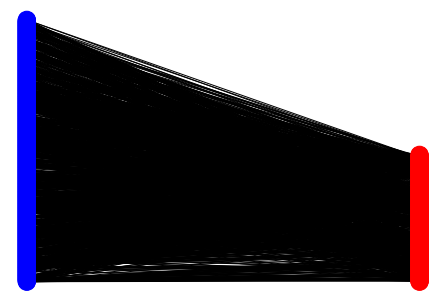

In [34]:
################ALL#########################3

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
yeshuvim = set(sum(df_group.List_of_yeshuvim,[]))

#yeshuvim.remove('Nir Am')

B.add_nodes_from(yeshuvim, bipartite=0)
B.add_nodes_from(df_group["datetime"].tolist(), bipartite=1)

for row in df_group.itertuples():
    for yeshuv in row.List_of_yeshuvim:
         B.add_edge(yeshuv,row.datetime)
# bottom_nodes, top_nodes = bipartite.sets(B)

color = bipartite.color(B)

color_dict = {0:'b',1:'r'}

color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')]



# Draw bipartite graph
pos = dict()
color = []
pos.update( (n, (1, i)) for i, n in enumerate(df_2021.data.unique().tolist()) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(df_group["datetime"].tolist()) ) # put nodes from Y at x=2

nx.draw(B, pos=pos, with_labels=False, node_color = color_list)
plt.show()

In [119]:
#! conda list python

In [35]:
yeshuvim_node = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
len(yeshuvim_node)

387

In [36]:
Time_node = {n for n, d in B.nodes(data=True) if d["bipartite"] == 1}
len(Time_node)

188

In [37]:
degX, degY = bipartite.degrees(B,yeshuvim_node)
d = dict(degX)
dict(sorted(d.items(), key=lambda item: item[1]))

{Timestamp('2021-05-11 14:20:00'): 1,
 Timestamp('2021-05-12 10:50:00'): 1,
 Timestamp('2021-05-11 20:26:00'): 1,
 Timestamp('2021-05-12 05:24:00'): 1,
 Timestamp('2021-05-10 21:37:00'): 1,
 Timestamp('2021-05-11 02:47:00'): 1,
 Timestamp('2021-05-11 18:55:00'): 1,
 Timestamp('2021-05-12 16:47:00'): 1,
 Timestamp('2021-05-11 09:55:00'): 1,
 Timestamp('2021-05-12 12:47:00'): 1,
 Timestamp('2021-05-11 06:05:00'): 1,
 Timestamp('2021-05-12 13:53:00'): 1,
 Timestamp('2021-05-12 11:11:00'): 1,
 Timestamp('2021-05-11 14:28:00'): 1,
 Timestamp('2021-05-11 17:48:00'): 1,
 Timestamp('2021-05-11 12:53:00'): 1,
 Timestamp('2021-05-12 11:17:00'): 1,
 Timestamp('2021-05-10 18:59:00'): 1,
 Timestamp('2021-05-11 19:13:00'): 1,
 Timestamp('2021-05-12 18:44:00'): 1,
 Timestamp('2021-05-12 13:44:00'): 1,
 Timestamp('2021-05-11 12:30:00'): 1,
 Timestamp('2021-05-10 22:07:00'): 1,
 Timestamp('2021-05-11 09:40:00'): 1,
 Timestamp('2021-05-11 08:35:00'): 1,
 Timestamp('2021-05-12 11:33:00'): 1,
 Timestamp('

In [38]:
d= dict(degY)



dict(sorted(d.items(), key=lambda item: item[1]))


{'ירושלים': 1,
 'שער אפרים': 1,
 'כפר סירקין': 1,
 'תדהר': 1,
 'בית עוזיאל': 1,
 'בקוע': 1,
 'נירית': 1,
 'אלפי מנשה': 1,
 'חגור': 1,
 'תימורים': 1,
 'כפר עבודה': 1,
 "דריג'את": 1,
 'מוצא עילית': 1,
 'נווה ימין': 1,
 'נורדייה': 1,
 'קוממיות': 1,
 "ג'לג'וליה": 1,
 'קריית יערים': 1,
 'עין נקובא': 1,
 'ברוש': 1,
 'עזריאל': 1,
 'אבן יהודה': 1,
 'זכריה': 1,
 'קלחים': 1,
 'עגור': 1,
 'מודיעין-מכבים-רעות*': 1,
 'בית שמש': 1,
 'בני נצרים': 1,
 'מודיעין עילית': 1,
 'כפר רות': 1,
 'ארסוף': 1,
 'תלמי אליהו': 1,
 'אשבול': 1,
 'גנות הדר': 1,
 'גבעת יערים': 1,
 'תל מונד': 1,
 'בארותיים': 1,
 'ניר משה': 1,
 'נתניה': 1,
 'טייבה': 1,
 'תפרח': 1,
 'גבעת ישעיהו': 1,
 'כפר הס': 1,
 'מבוא מודיעים': 1,
 'פעמי תש"ז': 1,
 'עינת': 1,
 'ערוגות': 1,
 'כפר בן נון': 1,
 'משמר איילון': 1,
 'כרמי יוסף': 1,
 'אשכולות': 1,
 'מעלה החמישה': 1,
 'רעים': 1,
 'אבן ספיר': 1,
 'רווחה': 1,
 'עין ורד': 1,
 'משמר דוד': 1,
 'עולש': 1,
 'נגבה': 1,
 'רמת הכובש': 1,
 'אלישמע': 1,
 'פדיה': 1,
 'ערד': 1,
 'בית חשמונאי': 1,
 'צופית': 

In [39]:
type(degY)

networkx.classes.reportviews.DegreeView

In [40]:
import math
def plot_degree_dist(G):
   
    w = 3
    #degrees_y = [G.degree(n) for n,d in G.nodes(data=True) if d["bipartite"] == 0]
    degrees_X = [G.degree(n) for n,d in G.nodes(data=True) if d["bipartite"] == 0]
    #plt.hist(degrees_y)
    plt.figure(figsize=(8,6))
    n = math.ceil((123 - 1)/w)
    #ax = plt.hist(degrees_y, bins = n)
    ax = plt.hist(degrees_x, bins = n)
    #plt.yscale('log')  
    plt.ylabel('num of yeshuvim') 
    plt.xlabel('num of atraot') 
    
    plt.ylabel('num of Time stamp') 
    plt.xlabel('Num of yishuvim mutraim') 
    plt.show()

plot_degree_dist(B)

NameError: name 'degrees_x' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:


# G = some networkx graph
#yeshuvim
degrees_y = [B.degree(n) for n,d in B.nodes(data=True) if d["bipartite"] == 0]
degree_counts_y = Counter(degrees_y)                                                                                                 
x1, y1 = zip(*degree_counts_y.items())                                                      

plt.figure(1)   

# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
#plt.xscale('log')                                                                                                                
plt.xlim(1, max(x1))  

plt.ylabel('frequency')                                                                                                          
#plt.yscale('log')                                                                                                                
plt.ylim(1, max(y1))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(x1, y1, marker='.')                                                                                                    
plt.show()


plt.plot(x1, y1)




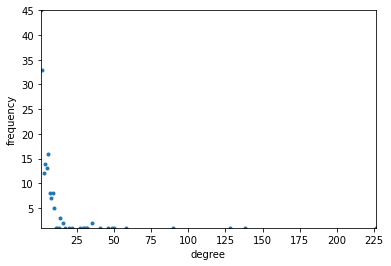

In [41]:

degrees_x = [B.degree(n) for n,d in B.nodes(data=True) if d["bipartite"] == 1]
degree_counts_x = Counter(degrees_x)                                                                                                 
x2, y2 = zip(*degree_counts_x.items())     

plt.figure(1)   

# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
#plt.xscale('log')                                                                                                                
plt.xlim(1, max(x2))  

plt.ylabel('frequency')                                                                                                          
#plt.yscale('log')                                                                                                                
plt.ylim(1, max(y2))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(x2, y2, marker='.')                                                                                                    
plt.show()




In [42]:
# fig, (ax1, ax2) = plt.subplots( 1 , 2)#,sharex=True
# fig.tight_layout(pad=5.0)

# ax1.plot(x1, y1, marker='.')
# ax1.set_title('Yeshuvim Degree')
# ax1.set(xlabel='degree', ylabel='frequency')

# ax2.plot(x2, y2, marker='.')
# ax2.set_title('time Degree')
# ax2.set(xlabel='degree', ylabel='frequency')


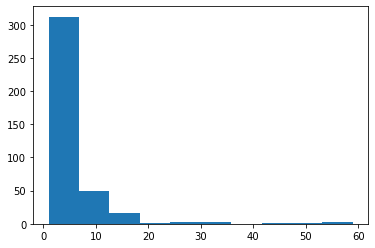

In [43]:
degrees_y = [B.degree(n) for n,d in B.nodes(data=True) if d["bipartite"] == 0]
plt.hist(degrees_y)
plt.show()

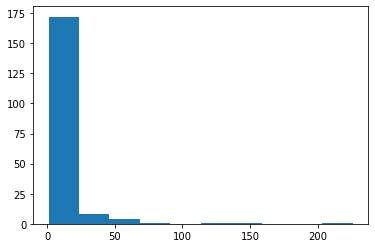

In [44]:
degrees_y = [B.degree(n) for n,d in B.nodes(data=True) if d["bipartite"] == 1]
# plt.xscale = ('log')
# plt.yscale = ('log')                                                                                                       
 
plt.hist(degrees_y)
plt.show()

In [45]:
#yeshuvim weigthed graph
G  = nx.Graph(nodes= df_2021.data.unique())
weight_edges = {}
for time in Time_node:
    #print(time)
    neighbours =  list(B.neighbors(time)) 
    #print(neighbours)
    for yeshuv_a in neighbours:
            for yeshuv_b in neighbours:
                if yeshuv_a != yeshuv_b and ((yeshuv_b, yeshuv_a) not in weight_edges):
                    weight_edges[(yeshuv_a, yeshuv_b)] = weight_edges.get((yeshuv_a, yeshuv_b), 0) + 1

In [46]:
# weight_edges
# len(weight_edges)


In [47]:
for yeshuvim in weight_edges.keys():
    G.add_edge(yeshuvim[0],yeshuvim[1])
    G[yeshuvim[0]][yeshuvim[1]]['weight'] = weight_edges[yeshuvim]



In [48]:
# nx.draw(G)
# plt.show()

In [49]:
df_Node = df_2021[["data","X","Y"]]
df_Node.drop_duplicates(inplace=True)
df_Node = df_Node.rename(columns={'data': 'label' ,'X': 'Latitude ','Y': 'longitude '})
df_Node.reset_index()

<ipython-input-49-014023752ef2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Node.drop_duplicates(inplace=True)


,index,label,Latitude,longitude
0,41,איבים,162974.0,604773.0
1,168,אל סייד,191786.0,577113.0
2,714,קריית גת,177830.0,613082.0
3,755,שדרות,161506.0,604180.0
4,2470,ערד,220359.0,574141.0
...,...,...,...,...
382,14188,תלמי יפה,163386.0,614131.0
383,14201,תנובות,196689.0,690224.0
384,14215,תעשיון צריפין,186262.0,652278.0
385,14232,תפרח,169368.0,581637.0


In [50]:
#df_Node = pd.DataFrame(G.nodes)
df_egde = pd.DataFrame(G.edges)
df_weight = pd.DataFrame(data=weight_edges, index=[0])
df_weight = (df_weight.T)




In [51]:
df_weight.head()

0
אשקלון בית שקמה  14
       בת הדר    17
       גברעם      3
       גיאה      12
       זיקים     46

In [52]:
df_egde.to_excel("edges.xlsx")
df_Node.to_excel("nodes.xlsx")
df_weight.to_excel("weights.xlsx")

In [200]:
from pyproj import Proj, transform


def reproject_wgs_to_itm(longitude, latitude):
    prj_wgs = Proj(init='epsg:4326')
    prj_itm = Proj(init='epsg:2157')
    x, y = transform(prj_wgs, prj_itm, longitude, latitude)
    return x, y


#print (reproject_wgs_to_itm(-7.748108, 53.431628))
#print (reproject_wgs_to_itm(31.503301094593382, 34.46078270008858))

print (reproject_wgs_to_itm(31.569771826408743, 34.53423177035126))

(4321717.4846715685, -551414.9228951961)


C:\Users\12345\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\12345\anaconda3\lib\site-packages\pyproj\crs\crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\12345\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

In [53]:
#Time_node

In [54]:
#Timestamp weigthed graph

G  = nx.Graph(nodes= Time_node)
weight_edges = {}
for yeshuv in yeshuvim_node:
    #print(time)
    neighbours =  list(B.neighbors(yeshuv)) 
    #print(neighbours)
    for time_a in neighbours:
            for time_b in neighbours:
                if time_a != time_b and ((time_b, time_a) not in weight_edges):
                    weight_edges[(time_a, time_b)] = weight_edges.get((time_a, time_b), 0) + 1
                    
for time_stamp in weight_edges.keys():
    G.add_edge(time_stamp[0],time_stamp[1])
    G[time_stamp[0]][time_stamp[1]]['weight'] = weight_edges[time_stamp]

In [55]:
df_Node_time = pd.DataFrame(G.nodes)
df_egde_time = pd.DataFrame(G.edges)
df_weight_time = pd.DataFrame(data=weight_edges, index=[0])
df_weight_time = (df_weight_time.T)

In [56]:

df_Node_time.to_excel("nodes_time.xlsx")
df_weight_time.to_excel("weights_time.xlsx")